# PROJET 4 : Segmentation des clients d'un site e-commerce


## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [CONTEXTE DU PROJET](#1)<a class="anchor" id="sommaire"></a>
## [LES DONNEES DU PROJET](#2)<a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [MISSION 1: CHARGEMENT DES FICHIERS](#4)<a class="anchor" id="sommaire"></a>
### [M1-1 : Chargement des fichiers](#6)<a class="anchor" id="sommaire"></a>
### [M1-2 : Description des données ](#7)<a class="anchor" id="sommaire"></a>
### [M1-3 : Mis en évidence des points intéressants ](#8)<a class="anchor" id="sommaire"></a>
## [MISSION 2: NETTOYAGE DES DONNEES](#9)<a class="anchor" id="sommaire"></a>
### [M2-1 : Application des filtres ](#10)<a class="anchor" id="sommaire"></a>
## [MISSION 3 : FUSION DES DONNEES](#11)<a class="anchor" id="sommaire"></a>
### [M3-1 : Fusion des données](#12)<a class="anchor" id="sommaire"></a>
## [MISSION 4 : ENRICHISSEMENT](#13)<a class="anchor" id="sommaire"></a>
### [M4-1 : Enrichissement via des nouvelles variables](#14)<a class="anchor" id="sommaire"></a>
## [MiSSION 5 : ANALYSE](#15)<a class="anchor" id="sommaire"></a>
### [M5-1 : Analyse des variables quantitaives ](#16)<a class="anchor" id="sommaire"></a>
### [M5-2 : Transformation des variables ](#17)<a class="anchor" id="sommaire"></a>
## [SAUVEGARDE DES DONNEES](#18)<a class="anchor" id="sommaire"></a>


--------------------------------------------------------

## [CONTEXTE DU PROJET](#sommaire)<a class="anchor" id="1"></a>

## [LES DONNEES DU PROJET](#sommaire)<a class="anchor" id="2"></a>

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.functions import *
import os

In [2]:
# Configuration affichage
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## [MISSION 1 : CHARGEMENT DES FICHIERS](#sommaire)<a class="anchor" id="4"></a>

### [M1-1 : Chargement des fichiers](#sommaire)<a class="anchor" id="6"></a>

In [3]:
customers = pd.read_csv('data/olist_customers_dataset.csv', sep=',', engine='python')
print('customers : ',customers.shape)

geolocation = pd.read_csv('data/olist_geolocation_dataset.csv', sep=',', engine='python')
print('geolocation : ',geolocation.shape)

order_items = pd.read_csv('data/olist_order_items_dataset.csv', sep=',', engine='python')
print('order_items : ',order_items.shape)

order_payments = pd.read_csv('data/olist_order_payments_dataset.csv', sep=',', engine='python')
print('order_payments : ',order_payments.shape)

orders = pd.read_csv('data/olist_orders_dataset.csv', sep=',', engine='python')
print('orders : ',orders.shape)

order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv', sep=',', engine='python')
print('order_reviews : ',order_reviews.shape)

products = pd.read_csv('data/olist_products_dataset.csv', sep=',', engine='python')
print('products : ',products.shape)

sellers = pd.read_csv('data/olist_sellers_dataset.csv', sep=',', engine='python')
print('sellers : ',sellers.shape)

category_name_translation = pd.read_csv('data/product_category_name_translation.csv', sep=',', engine='python')
print('category_name_translation : ',category_name_translation.shape)

customers :  (99441, 5)
geolocation :  (1000163, 5)
order_items :  (112650, 7)
order_payments :  (103886, 5)
orders :  (99441, 8)
order_reviews :  (100000, 7)
products :  (32951, 9)
sellers :  (3095, 4)
category_name_translation :  (71, 2)


### [M1-2 : Description des données : ](#sommaire)<a class="anchor" id="7"></a>

In [4]:
# Customers : Base des données des clients / Clé primaire : customer_id  
# //// clé étrangère : Customers.customer_zip_code_prefix = geolocation.geolocation_zip_code_prefix 
#customers.info()

In [5]:
# geolocation : Base des données des géolocalisation / Clé primaire : geolocation_zip_code_prefix
#geolocation.info()

In [6]:
# order_items : Base des données des articles commandés / Clé primaire : order_item_id + order_id  
# //// clés étrangères : order_items.product_id = products.product_id  et  order_items.seller_id = sellers.seller_id
#order_items.info()

In [7]:
# order_payments : Base des paiements de commande / Clé primaire : order_id   
#order_payments.info()

In [8]:
# order_reviews : Base des avis de commande / Clé primaire : review_id  
# //// clé étrangère : order_reviews.order_id -> order_payments.order_id 
#order_reviews.info()

In [9]:
# orders : Base des commandes / Clé primaire : orders_id  
# //// clé étrangère : orders.customer_id = customers.customer_id 
#orders.info()

In [10]:
# products : Base des produits / Clé primaire : product_id  
#products.info()

In [11]:
# sellers : Base des données des vendeurs / Clé primaire : seller_id  
# //// clé étrangère : sellers.seller_zip_code_prefix = geolocation.geolocation_zip_code_prefix 
#sellers.info()

In [12]:
# category_name_translation : Base des traductions des noms de categories des produits 
# category_name_translation.ï»¿product_category_name = products.product_category_name
#category_name_translation.info()

### [M1-3 : Mis en évidence des points intéressants :](#sommaire)<a class="anchor" id="8"></a>

### Repartition des Clients par Etat :

Affichage de l'histogramme de commande par Etat :


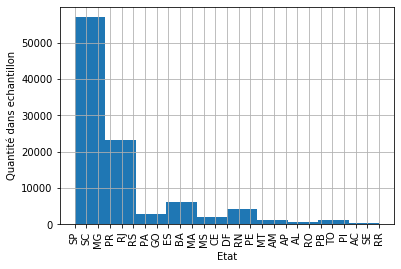

In [13]:
# Répartition des achats en fonctions en fonction du montant 'price' : 
customers['customer_state'].hist()
print("Affichage de l'histogramme de commande par Etat :")
plt.xlabel('Etat') 
plt.ylabel('Quantité dans echantillon')
plt.xticks(rotation=90)
plt.show() 

In [14]:
NumberCustomers_GroupByState = customers.groupby('customer_state').size()
print(NumberCustomers_GroupByState)

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
dtype: int64


### Différents status des commandes : 

Affichage de l'histogramme de statuts de commande :


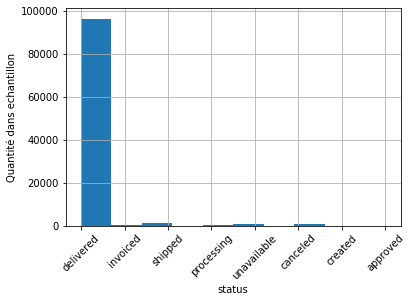

In [15]:
# Répartition des achats en fonctions en fonction du montant 'price' : 
orders['order_status'].hist()
print("Affichage de l'histogramme de statuts de commande :")
plt.xlabel('status') 
plt.ylabel('Quantité dans echantillon')
plt.xticks(rotation=45)
plt.show() 

In [16]:
orders_GroupByStatuts = orders.groupby('order_status').size()
print(orders_GroupByStatuts)

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
dtype: int64


### Périodes des achats :

In [17]:
print ('Debut des achats : ',min( pd.to_datetime(orders['order_approved_at']).dt.date))
print ('Fin des achats : ',max(pd.to_datetime(orders['order_approved_at']).dt.date))

Debut des achats :  2016-09-15
Fin des achats :  2018-09-03


Données de 2 ans entre sept 2016 et sept 2018

### Distribution des scores : 

Distribution des scores sur les commandes :


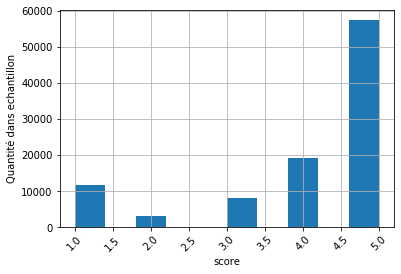

In [18]:
order_reviews["review_score"].hist()
print("Distribution des scores sur les commandes :")
plt.xlabel('score') 
plt.ylabel('Quantité dans echantillon')
plt.xticks(rotation=45)
plt.show()

In [19]:
order_reviews_GroupByScore = order_reviews.groupby('review_score').size()
order_reviews_GroupByScore

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
dtype: int64

### Nombre des commandes par jour :

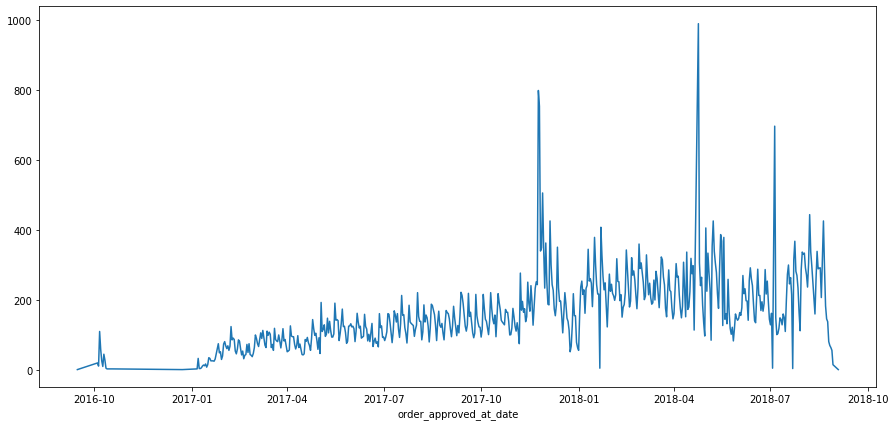

In [20]:
orders['order_approved_at_date'] = pd.to_datetime(orders['order_approved_at']).dt.date

# Affichage des évolutions des nombres de commande entre sept 2016 et sept 2018
fig, ax = plt.subplots(figsize=(15,7))
orders.groupby(['order_approved_at_date']).size().plot(ax=ax)

In [21]:
NumberOrders_GroupByDate = orders.groupby('order_approved_at_date').size()
print(NumberOrders_GroupByDate)

order_approved_at_date
2016-09-15      1
2016-10-04     20
2016-10-05     11
2016-10-06    110
2016-10-07     59
             ... 
2018-08-26     70
2018-08-27     64
2018-08-28     56
2018-08-29     15
2018-09-03      1
Length: 611, dtype: int64


#### On constate que les données à disposition commencent rééllement en janvier 2017 mais pas en sept 2016

### Répartition des achats :

In [22]:
#order_items
print ('Prix minimum : ',min(order_items['price']),' /// maximm : ',max(order_items['price']))
print ('Frais de livraison minimum : ', min(order_items['freight_value']),' /// maximm : ',max(order_items['freight_value']))

Prix minimum :  0.85  /// maximm :  6735.0
Frais de livraison minimum :  0.0  /// maximm :  409.68


Affichage de l'histogramme de Prix :


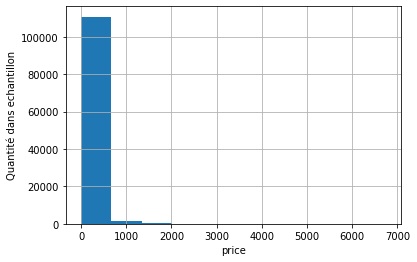

In [23]:
# Répartition des achats en fonctions en fonction du montant 'price' : 
order_items['price'].hist()
print("Affichage de l'histogramme de "+ str('Prix') + " :")
plt.xlabel('price') 
plt.ylabel('Quantité dans echantillon')
plt.show() 

In [24]:
# Commande supérieur à 2000 $
#order_items[(order_items['price'] >= 2000)]['price'].hist()
#print("Affichage de l'histogramme de Prix pour un montant supérieur 2000 $ :")
#plt.xlabel('price') 
#plt.ylabel('Quantité dans echantillon')
#plt.show() 

Affichage de l'histogramme de frais de livraison :


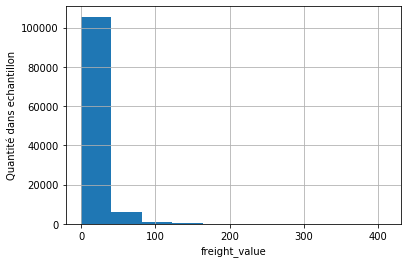

In [25]:
# Répartition des achats en fonctions en fonction du montant 'freight_value' : 
order_items['freight_value'].hist()
print("Affichage de l'histogramme de frais de livraison :")
plt.xlabel('freight_value') 
plt.ylabel('Quantité dans echantillon')
plt.show() 

In [26]:
# Répartition des achats en fonctions en fonction du montant 'freight_value' : 
#order_items[(order_items['freight_value'] >= 100)]['freight_value'].hist()
#print("Affichage de l'histogramme de frais de livraison supérieur à 100 $ :")
#plt.xlabel('freight_value') 
#plt.ylabel('Quantité dans echantillon')
#plt.show() 

## [MISSION 2 : NETTOYAGE DES DONNES](#sommaire)<a class="anchor" id="9"></a>

Il faut :
- Garder que le statut "delivered" car les autres sont des statuts temporaires ou pas significatifs
- Garder La periode d'achat à partir du 01/01/2017 car les ventes commencent rééllement à partir de cette date
- Score d'une commande : Si doublons de score sur order_id, faire une moyenne de score et ne garder qu'un order_id 
- Ne pas Garder la geolocalisation mais juste le nom de la ville et l'état 

### [M2-1 : Application des filtres ](#sommaire)<a class="anchor" id="10"></a>

In [27]:
#orders.info()

In [28]:
# customers
# A supprimer : Rien
customers_copy = customers.copy()

# geolocation
# Ne pas Garder la geolocalisation mais juste le nom de la ville et l'état, donc à supprimer : geolocation_lat,geolocation_lng
geolocation_copy = geolocation.drop(columns=['geolocation_lat', 'geolocation_lng'])

# order_items
# A supprimer : rien
order_items_copy = order_items.copy()

# order_payments
# regrouper par order_id et payment type : Si doublons faire une somme de montant et ne garder qu'un 
order_payments_copy = order_payments.groupby(['order_id','payment_type'])["payment_value"].sum().reset_index(name ='Total payment_value')
order_payments_copy2 = order_payments.groupby('order_id')["payment_value"].sum().reset_index(name ='Total payment_value_Order')
order_payments_type = order_payments_copy.copy()
order_payments_type.drop(columns=['Total payment_value'], inplace=True)

# order_reviews
# regrouper par order_id : Si doublons sur order_id, faire une moyenne de score et ne garder qu'un order_id 
order_reviews_copy = order_reviews.groupby('order_id')['review_score'].mean().reset_index()

# orders
# A supprimer : les commandes passées avant 01 janvier 2017 et ne garder que le status 'delivered'
orders_copy = orders.copy()
orders_copy = orders[(orders['order_purchase_timestamp'] >= '2017-01-01 00:00:00') & (orders['order_status'] == 'delivered' )]

# products
# Recuperer la traduction des categorie de produit en anglais dans la table products
products_copy = pd.merge(products, category_name_translation, left_on = 'product_category_name', right_on = 'ï»¿product_category_name', how = 'inner')
# A supprimer les caracteristiques physiques des produits : product_name_lenght,product_description_lenght,product_photos_qtyproduct_weight_g,product_length_cm,product_height_cm,product_width_cm
products_copy = products_copy.drop(columns=['product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_height_cm','product_width_cm','ï»¿product_category_name'])

# sellers
# A supprimer : Rien
sellers_copy = sellers.copy()

# category_name_translation
# A supprimer : Rien
category_name_translation_copy = category_name_translation.copy()

## [MISSION 3: FUSION DES DONNEES](#sommaire)<a class="anchor" id="11"></a>

### [M3-1 : Fusion des données](#sommaire)<a class="anchor" id="12"></a>

In [29]:
# Merge Orders and order_reviews : pour recuperer les scores de commande
OrdersMergeReviews = pd.merge(orders_copy, order_reviews_copy, left_on = 'order_id', right_on = 'order_id', how = 'inner')

OrdersMergeReviews.shape

(96211, 10)

In [30]:
# And Merge customers
OrdersMergeReviewsMergeCustomers = pd.merge(OrdersMergeReviews, customers_copy, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
OrdersMergeReviewsMergeCustomers.shape

(96211, 14)

In [31]:
# And Merge order_payments
OrdersMergeReviewsMergeCustomersMergePayments = pd.merge(OrdersMergeReviewsMergeCustomers,order_payments_copy2, left_on = 'order_id', right_on = 'order_id', how = 'inner')
OrdersMergeReviewsMergeCustomersMergePaymentsType = pd.merge(OrdersMergeReviewsMergeCustomersMergePayments,order_payments_type, left_on = 'order_id', right_on = 'order_id', how = 'inner')
NbrPaymentsTypeByOrder = OrdersMergeReviewsMergeCustomersMergePaymentsType.groupby('order_id')['payment_type'].count().reset_index(name ='nbrPaymentType')
OrdersMergeReviewsMergeCustomersMergePaymentsType = pd.merge(OrdersMergeReviewsMergeCustomersMergePaymentsType,NbrPaymentsTypeByOrder, left_on = 'order_id', right_on = 'order_id', how = 'inner')
OrdersMergeReviewsMergeCustomersMergePaymentsType.shape

(98388, 17)

In [34]:
# Merge products and OrderItem
OrderItemsMergeProducts = pd.merge(order_items_copy, products_copy, left_on = 'product_id', right_on = 'product_id', how = 'inner')
OrderItemsMergeProducts.shape

(111023, 10)

In [35]:
# Orders Merge OrderItem : pour récuperer le details de chaque commande
AllData = pd.merge(OrderItemsMergeProducts, OrdersMergeReviewsMergeCustomersMergePaymentsType, left_on = 'order_id', right_on = 'order_id', how = 'inner')

AllData.shape

(110718, 26)

In [36]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110718 entries, 0 to 110717
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110718 non-null  object 
 1   order_item_id                  110718 non-null  int64  
 2   product_id                     110718 non-null  object 
 3   seller_id                      110718 non-null  object 
 4   shipping_limit_date            110718 non-null  object 
 5   price                          110718 non-null  float64
 6   freight_value                  110718 non-null  float64
 7   product_category_name          110718 non-null  object 
 8   product_photos_qty             110718 non-null  float64
 9   product_category_name_english  110718 non-null  object 
 10  customer_id                    110718 non-null  object 
 11  order_status                   110718 non-null  object 
 12  order_purchase_timestamp      

## [MISSION 4: ENRICHISSEMENT](#sommaire)<a class="anchor" id="13"></a>

### [M4-1 : Enrichissement via des nouvelles variables](#sommaire)<a class="anchor" id="14"></a>

In [38]:
# Quelles sont les tables qui apportent les éléments important pour une segmentation comportementale ?
# C'est la table customers mais on aura besoin de la fusion des tables pour analyser les comportements 

In [39]:
# Analyser les consommateurs sur 3 facteurs :
#        Récence : La date de dernière achat du client.
#        Frequence : La frequence d'achat du client pour une durée determinée
#        Monétaire : La dépense du client durant cette durée

# Donc on ajoutera ces 3 facteurs dans notre base des données.
# calcul de la date de dernier achat : date max  - date 

# calcul de la fréquence d'achat : nombre de commande total

# calcul de la dépense du client :

# Score de satisfaction sur l'ensmble des commandes

# Montant des achats par categories de produit

#### Création des features pour les analyses :

In [40]:
# calcul de la durée de dernier achat :
AllDataRecenceByCustomer = AllData.groupby('customer_id')['order_purchase_timestamp'].max().reset_index(name ='Last_order_date')
customers_Behaviour = pd.merge(customers_copy, AllDataRecenceByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

customers_Behaviour['max_date_order'] =  AllData['order_purchase_timestamp'].max()
# Formater les dates pour faire les calculs
customers_Behaviour.max_date_order = customers_Behaviour.max_date_order.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
customers_Behaviour.Last_order_date = customers_Behaviour.Last_order_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# calcul de la recence (en jour) :
customers_Behaviour['recency_order'] =  (customers_Behaviour.max_date_order - customers_Behaviour.Last_order_date)
customers_Behaviour.recency_order = abs(customers_Behaviour.recency_order.apply(lambda x: x.total_seconds()/86400)).astype(int)

In [41]:
# calcul de la fréquence d'achat :
AllDataFrequenceByCustomer = AllData.groupby('customer_id').size().reset_index(name ='frequency_order')
customers_Behaviour = pd.merge(customers_Behaviour, AllDataFrequenceByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
#customers_Behaviour.shape

In [42]:
# calcul de la dépense du client :
AllDataAmountByCustomer = AllData.groupby('customer_id')['Total payment_value_Order'].sum().reset_index(name ='monetary_amount_order')
customers_Behaviour = pd.merge(customers_Behaviour, AllDataAmountByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
#customers_Behaviour.shape

In [43]:
# calcul de nombre de mois de fréquence(durée arrondie en mois) :
FirstOrderByCustomer = AllData.groupby('customer_id')['order_purchase_timestamp'].min().reset_index(name ='First_order_date')
customers_Behaviour = pd.merge(customers_Behaviour, FirstOrderByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
customers_Behaviour.First_order_date = customers_Behaviour.First_order_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# calcul de nombre de mois de fréquence(durée arrondie en mois) :
customers_Behaviour['duration_frequence_order'] =  (customers_Behaviour.max_date_order - customers_Behaviour.First_order_date)
customers_Behaviour.duration_frequence_order = abs(customers_Behaviour.duration_frequence_order.apply(lambda x: x.total_seconds()/(86400*30))).astype(int)

customers_Behaviour.drop(columns=['First_order_date','Last_order_date','max_date_order','customer_zip_code_prefix'], inplace=True)

In [44]:
# calcul de panier moyen du client :
customers_Behaviour['mean_value_order'] = customers_Behaviour['monetary_amount_order'] / customers_Behaviour['frequency_order']

In [45]:
# Calcul des moyennes de satisfactions du client sur l'ensemble de ses commandes :
AllDataReviewScoreByCustomer = AllData.groupby('customer_id')['review_score'].mean().reset_index(name ='review_score_order')
customers_Behaviour = pd.merge(customers_Behaviour, AllDataReviewScoreByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

In [46]:
# calcul des photos des produits achetés :
AllDataPhotosProductByCustomer = AllData.groupby('customer_id')['product_photos_qty'].sum().reset_index(name ='sum_product_photos_order')
customers_Behaviour = pd.merge(customers_Behaviour, AllDataPhotosProductByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
# calcul de nombre de produits des produits achetés :
AllDataNbrProductsByCustomer = AllData.groupby('customer_id')['product_id'].size().reset_index(name ='nbr_products_customer')
customers_Behaviour = pd.merge(customers_Behaviour, AllDataNbrProductsByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

In [47]:
# calcul de nombre des photos moyen par produit pour un consommateur :
customers_Behaviour['mean_number_photos'] = abs(customers_Behaviour['sum_product_photos_order'] / customers_Behaviour['nbr_products_customer']).astype(int)
customers_Behaviour.drop(columns=['sum_product_photos_order','nbr_products_customer'], inplace=True)

In [48]:
AllData.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [51]:
# Calcul de nombre de type de paiement differents :
AllDataPaymentsTypeByCustomer = AllData.groupby(['customer_id','order_id'])['nbrPaymentType'].max().reset_index(name ='nbr_payments_type')
customers_Behaviour = pd.merge(customers_Behaviour, AllDataPaymentsTypeByCustomer, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94862 entries, 0 to 94861
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               94862 non-null  object 
 1   customer_unique_id        94862 non-null  object 
 2   customer_city             94862 non-null  object 
 3   customer_state            94862 non-null  object 
 4   recency_order             94862 non-null  int32  
 5   frequency_order           94862 non-null  int64  
 6   monetary_amount_order     94862 non-null  float64
 7   duration_frequence_order  94862 non-null  int32  
 8   mean_value_order          94862 non-null  float64
 9   review_score_order        94862 non-null  float64
 10  mean_number_photos        94862 non-null  int32  
 11  order_id                  94862 non-null  object 
 12  nbr_payments_type         94862 non-null  int64  
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 9.

In [52]:
# Ajout des colonnes categories regroupées dans notre Dataframe globale
product_categories_df = setCategoriesData()

AllData = pd.merge(AllData, product_categories_df, left_on = 'product_category_name_english', right_on = 'category', how = 'inner').drop(columns=['category'])

gpCatAmountByCustomer = AllData.groupby(['customer_id','product_category_group'])['Total payment_value_Order'].sum().reset_index(name ='Amount order By CategGroup')
# Liste de groupe des categories :
gpCatAmountByCustomer.product_category_group.unique()

array(['sports_leisure', 'health_beauty', 'home', 'furniture', 'fashion',
       'misc', 'construction', 'electronics', 'supplies', 'food_drink',
       'gifts'], dtype=object)

In [53]:
# Constituer les colonnes des CA du client par catégories:  

customers_Final_Behaviour = customers_Behaviour.copy()

# Ajout de la colonne "Amount sports_leisure"
sports_leisure= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='sports_leisure'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, sports_leisure, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_sports_leisure"}, inplace=True)

# Ajout de la colonne "Amount health_beauty" 
health_beauty= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='health_beauty'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, health_beauty, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_health_beauty"}, inplace=True)

# Ajout de la colonne "Amount home"
home= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='home'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, home, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_home"}, inplace=True)

# Ajout de la colonne "Amount furniture"
furniture= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='furniture'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, furniture, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_furniture"}, inplace=True)

# Ajout de la colonne "Amount fashion"
fashion= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='fashion'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, fashion, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_fashion"}, inplace=True)

# Ajout de la colonne "Amount misc"
misc= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='misc'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, misc, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_misc"}, inplace=True)

# Ajout de la colonne "Amount construction"
construction= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='construction'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, construction, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_construction"}, inplace=True)

# Ajout de la colonne "Amount electronics"
electronics= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='electronics'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, electronics, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_electronics"}, inplace=True)

# Ajout de la colonne "Amount supplies"
supplies= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='supplies'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, supplies, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_supplies"}, inplace=True)

# Ajout de la colonne "Amount food_drink"
food_drink= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='food_drink'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, food_drink, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_food_drink"}, inplace=True)

# Ajout de la colonne "Amount gifts"
gifts= gpCatAmountByCustomer[gpCatAmountByCustomer['product_category_group']=='gifts'].drop(columns=['product_category_group'])
customers_Final_Behaviour = pd.merge(customers_Final_Behaviour, gifts, left_on = 'customer_id', right_on = 'customer_id', how = 'left') 
customers_Final_Behaviour.rename(columns={"Amount order By CategGroup": "amount_gifts"}, inplace=True)

customers_Final_Behaviour.shape

(94862, 24)

In [54]:
customers_Final_Behaviour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94862 entries, 0 to 94861
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               94862 non-null  object 
 1   customer_unique_id        94862 non-null  object 
 2   customer_city             94862 non-null  object 
 3   customer_state            94862 non-null  object 
 4   recency_order             94862 non-null  int32  
 5   frequency_order           94862 non-null  int64  
 6   monetary_amount_order     94862 non-null  float64
 7   duration_frequence_order  94862 non-null  int32  
 8   mean_value_order          94862 non-null  float64
 9   review_score_order        94862 non-null  float64
 10  mean_number_photos        94862 non-null  int32  
 11  order_id                  94862 non-null  object 
 12  nbr_payments_type         94862 non-null  int64  
 13  amount_sports_leisure     13878 non-null  float64
 14  amount

In [57]:
#customers_Final_Behaviour.sort_values(by='nbr_payments_type', ascending=False)

In [58]:
customers_Final_Behaviour.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'recency_order', 'frequency_order', 'monetary_amount_order',
       'duration_frequence_order', 'mean_value_order', 'review_score_order',
       'mean_number_photos', 'order_id', 'nbr_payments_type',
       'amount_sports_leisure', 'amount_health_beauty', 'amount_home',
       'amount_furniture', 'amount_fashion', 'amount_misc',
       'amount_construction', 'amount_electronics', 'amount_supplies',
       'amount_food_drink', 'amount_gifts'],
      dtype='object')

## [MISSION 5: ANALYSE](#sommaire)<a class="anchor" id="15"></a>

### [M5-1 : Analyse des variables quantitatives ](#sommaire)<a class="anchor" id="16"></a>

#### La courbe de densité :

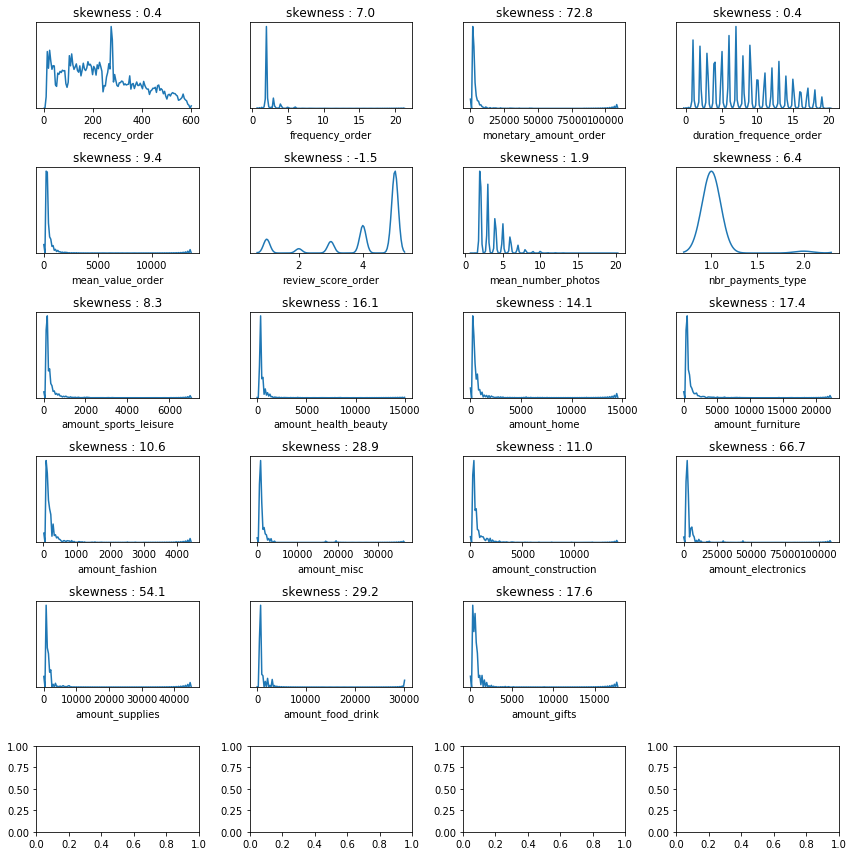

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [59]:
# Afficher la densité pour chaque variable quantitative, avec le coefficient skewness 
lines=6
cols=4
df = customers_Final_Behaviour.select_dtypes(include='number').copy()
fig, ax = plt.subplots(lines, cols, figsize=(min(15,cols*3),lines*2))
listVarDensite = ['recency_order', 'frequency_order', 'monetary_amount_order',
       'duration_frequence_order', 'mean_value_order', 'review_score_order',
       'mean_number_photos', 'nbr_payments_type',
       'amount_sports_leisure', 'amount_health_beauty', 'amount_home',
       'amount_furniture', 'amount_fashion', 'amount_misc',
       'amount_construction', 'amount_electronics', 'amount_supplies',
       'amount_food_drink', 'amount_gifts']

for i,val in enumerate(listVarDensite):
    bp = sns.distplot(df[val], hist=False, ax=ax[i//cols, i%cols], kde_kws={'bw': 0.1})
    bp.set_title("skewness : "+str(round(df[val].skew(),1)), fontsize=12)
    bp.set_yticks([])
    imax = i
for i in range(imax+1,lines*cols):
    ax[i//cols, i%cols].axis('off')
    plt.tight_layout()
    plt.show()

Nous constatons des distributions non asymetriques grâce au coefficient de skewness : Ce coefficient évalue le défaut de symétrie d'une distribution. 

Nous devons faire des transformations de normalisation sur les variables dont le coefficient est supérieur à 2 en utilisant log


#### La matrice des corrélations :

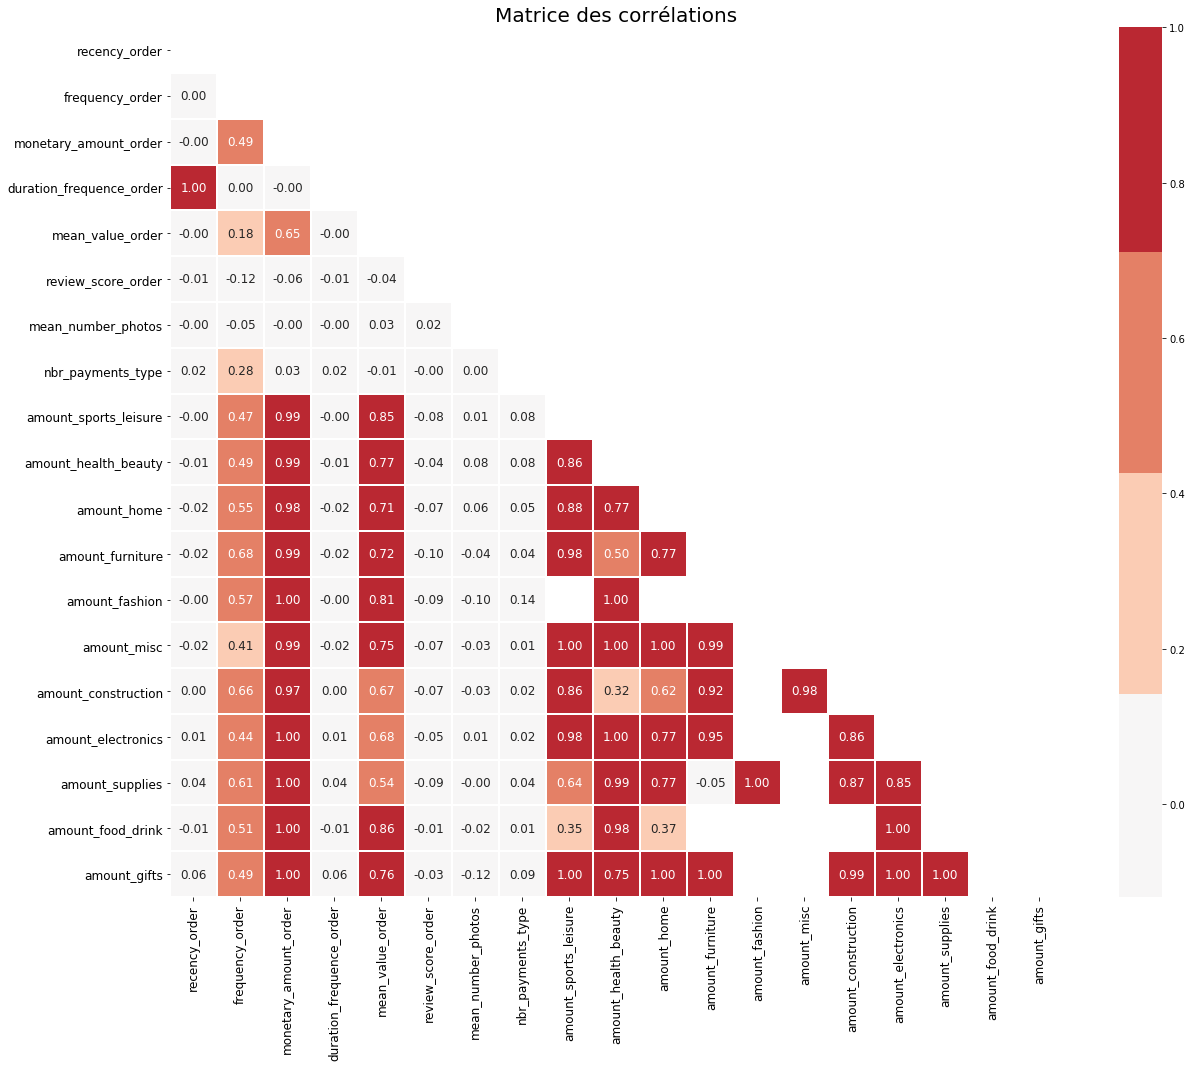

In [60]:
# Affichage de la matrice de correlation :
# Matrice des corrélations
#corr = AllData.corr() 
corr = customers_Final_Behaviour.corr()
# heatmap de la matrice de corrélation
plt.figure(figsize=(20,16))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, cmap=sns.color_palette("RdBu_r", 7), linewidths=1, 
            annot=True, annot_kws={"size":12}, fmt=".02f")

plt.title('Matrice des corrélations', fontsize=20)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

### [M5-2 : Transformation des variables ](#sommaire)<a class="anchor" id="17"></a>

Les transformations à faire sont :
- Normalisation des variables

#### Normalisation des variables :

In [61]:
customers_Final_Behaviour.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'recency_order', 'frequency_order', 'monetary_amount_order',
       'duration_frequence_order', 'mean_value_order', 'review_score_order',
       'mean_number_photos', 'order_id', 'nbr_payments_type',
       'amount_sports_leisure', 'amount_health_beauty', 'amount_home',
       'amount_furniture', 'amount_fashion', 'amount_misc',
       'amount_construction', 'amount_electronics', 'amount_supplies',
       'amount_food_drink', 'amount_gifts'],
      dtype='object')

In [65]:
# Normalisation des variables :

customers_Final_Behaviour_Log = customers_Final_Behaviour.copy()
listVarDensite = ['recency_order', 'frequency_order', 'monetary_amount_order',
       'duration_frequence_order', 'mean_value_order', 'review_score_order',
       'mean_number_photos', 'nbr_payments_type',
       'amount_sports_leisure', 'amount_health_beauty', 'amount_home',
       'amount_furniture', 'amount_fashion', 'amount_misc',
       'amount_construction', 'amount_electronics', 'amount_supplies',
       'amount_food_drink', 'amount_gifts']
for j,val in enumerate(listVarDensite):
    # transformer les données pour le rendre normales  
    #Les variables qui ont un coeeficient de skewness > 2
    if (customers_Final_Behaviour_Log[val].skew() > 2):
        customers_Final_Behaviour_Log[val] = np.log(customers_Final_Behaviour_Log[val] + 1)
    else :
        customers_Final_Behaviour_Log[val] = customers_Final_Behaviour_Log[val]
    
    jmax = j
    
customers_Final_Behaviour_Log.shape

(94862, 24)

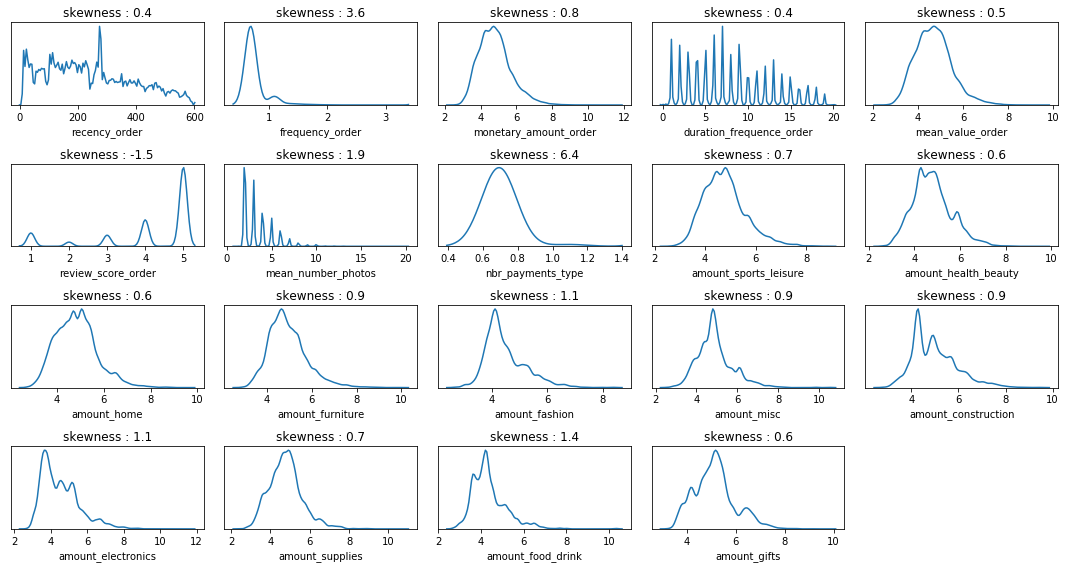

In [66]:
# Afficher la densité pour chaque variable quantitative, avec le coefficient skewness après la transformation 
lines=4
cols=5
df = customers_Final_Behaviour_Log.select_dtypes(include='number').copy()
fig, ax = plt.subplots(lines, cols, figsize=(min(15,cols*3),lines*2))
listVarDensite = ['recency_order', 'frequency_order', 'monetary_amount_order',
       'duration_frequence_order', 'mean_value_order', 'review_score_order',
       'mean_number_photos', 'nbr_payments_type',
       'amount_sports_leisure', 'amount_health_beauty', 'amount_home',
       'amount_furniture', 'amount_fashion', 'amount_misc',
       'amount_construction', 'amount_electronics', 'amount_supplies',
       'amount_food_drink', 'amount_gifts']

for i,val in enumerate(listVarDensite):
    bp = sns.distplot(df[val], hist=False, ax=ax[i//cols, i%cols], kde_kws={'bw': 0.1})
    bp.set_title("skewness : "+str(round(df[val].skew(),1)), fontsize=12)
    bp.set_yticks([])
    imax = i
for i in range(imax+1,lines*cols):
    ax[i//cols, i%cols].axis('off')
    plt.tight_layout()
    plt.show()

## [SAUVEGARDE DES DONNEES](#sommaire)<a class="anchor" id="18"></a>

In [67]:
# Sauvegarde du DF final pour éviter de recharger toutes les données à chaque fois
file_customers_Final_Behaviour_Log = 'data/final/customers_Final_Behaviour.csv'
file_AllData = 'data/final/AllData.csv'

if os.path.exists(file_customers_Final_Behaviour_Log):
    os.remove(file_customers_Final_Behaviour_Log)

customers_Final_Behaviour_Log.to_csv(file_customers_Final_Behaviour_Log, sep = '\t')
customers_Final_Behaviour_Log.shape

if os.path.exists(file_AllData):
    os.remove(file_AllData)

AllData.to_csv(file_AllData, sep = '\t')